# Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [2]:
#Load data and check the first rows
data = pd.read_csv(r"C:\Users\irola\Desktop\Dataset2\DogMoveData_csv_format\DogMoveData.csv")
data.head()

,DogID,TestNum,t_sec,ABack_x,ABack_y,ABack_z,ANeck_x,ANeck_y,ANeck_z,GBack_x,GBack_y,GBack_z,GNeck_x,GNeck_y,GNeck_z,Task,Behavior_1,Behavior_2,Behavior_3,PointEvent
0,16,1,0.00,0.041504,0.938965,-0.015137,-0.067871,-0.510254,-0.934570,-17.639161,-22.766115,7.446290,-7.934571,6.347657,13.427735,<undefined>,<undefined>,<undefined>,<undefined>,<undefined>
1,16,1,0.01,0.041992,0.941895,-0.020020,-0.128906,-0.494141,-0.913086,-15.075685,-11.413575,4.821778,-3.906250,4.394532,16.540528,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
2,16,1,0.02,0.040527,0.939453,-0.004395,-0.158691,-0.480469,-0.911133,-12.207032,-0.122070,2.807617,-0.488281,-1.953125,26.794435,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
3,16,1,0.03,0.021484,0.946289,0.007813,-0.122070,-0.486816,-0.880371,-9.460450,7.995606,1.586914,1.159668,-5.676270,38.085940,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
4,16,1,0.04,-0.000977,0.951172,0.033691,-0.053711,-0.500000,-0.807129,-8.361817,14.587403,-1.037598,4.577637,4.089356,41.503909,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>


In [3]:
data

,DogID,TestNum,t_sec,ABack_x,ABack_y,ABack_z,ANeck_x,ANeck_y,ANeck_z,GBack_x,GBack_y,GBack_z,GNeck_x,GNeck_y,GNeck_z,Task,Behavior_1,Behavior_2,Behavior_3,PointEvent
0,16,1,0.00,0.041504,0.938965,-0.015137,-0.067871,-0.510254,-0.934570,-17.639161,-22.766115,7.446290,-7.934571,6.347657,13.427735,<undefined>,<undefined>,<undefined>,<undefined>,<undefined>
1,16,1,0.01,0.041992,0.941895,-0.020020,-0.128906,-0.494141,-0.913086,-15.075685,-11.413575,4.821778,-3.906250,4.394532,16.540528,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
2,16,1,0.02,0.040527,0.939453,-0.004395,-0.158691,-0.480469,-0.911133,-12.207032,-0.122070,2.807617,-0.488281,-1.953125,26.794435,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
3,16,1,0.03,0.021484,0.946289,0.007813,-0.122070,-0.486816,-0.880371,-9.460450,7.995606,1.586914,1.159668,-5.676270,38.085940,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
4,16,1,0.04,-0.000977,0.951172,0.033691,-0.053711,-0.500000,-0.807129,-8.361817,14.587403,-1.037598,4.577637,4.089356,41.503909,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611063,74,2,1928.19,0.018066,0.436523,0.808105,-0.620605,0.326172,-0.647949,23.620607,75.317387,77.148442,-124.511726,107.727057,-122.497566,Task treat-search,Sniffing,<undefined>,<undefined>,<undefined>
10611064,74,2,1928.20,-0.021973,0.515625,0.813965,-0.671875,0.241211,-0.660645,34.729006,63.293461,79.956060,-116.455085,97.534186,-123.229988,Task treat-search,Sniffing,<undefined>,<undefined>,<undefined>
10611065,74,2,1928.21,-0.041504,0.507324,0.782227,-0.674805,0.244629,-0.627930,39.978030,49.316409,84.655767,-104.858405,95.458990,-124.816902,Task treat-search,Sniffing,<undefined>,<undefined>,<undefined>
10611066,74,2,1928.22,-0.032715,0.484375,0.824219,-0.685059,0.211426,-0.578613,38.024905,32.775881,89.538580,-87.463384,101.257330,-128.601082,Task treat-search,Sniffing,<undefined>,<undefined>,<undefined>


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10611068 entries, 0 to 10611067
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   DogID       int64  
 1   TestNum     int64  
 2   t_sec       float64
 3   ABack_x     float64
 4   ABack_y     float64
 5   ABack_z     float64
 6   ANeck_x     float64
 7   ANeck_y     float64
 8   ANeck_z     float64
 9   GBack_x     float64
 10  GBack_y     float64
 11  GBack_z     float64
 12  GNeck_x     float64
 13  GNeck_y     float64
 14  GNeck_z     float64
 15  Task        object 
 16  Behavior_1  object 
 17  Behavior_2  object 
 18  Behavior_3  object 
 19  PointEvent  object 
dtypes: float64(13), int64(2), object(5)
memory usage: 1.6+ GB


In [5]:
data.describe()

,DogID,TestNum,t_sec,ABack_x,ABack_y,ABack_z,ANeck_x,ANeck_y,ANeck_z,GBack_x,GBack_y,GBack_z,GNeck_x,GNeck_y,GNeck_z
count,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07,1.061107e+07
mean,4.388821e+01,1.333002e+00,8.629406e+02,4.884901e-02,-1.537441e-01,8.350742e-01,-1.701528e-01,-4.128977e-01,-6.305329e-01,-1.556436e+00,-8.295666e-01,2.372869e-01,6.878519e-01,-1.457102e-01,1.303734e-01
std,1.673927e+01,4.712874e-01,5.067347e+02,6.075926e-01,5.992544e-01,5.495108e-01,6.013990e-01,6.427448e-01,6.402730e-01,7.790840e+01,1.199866e+02,7.128056e+01,7.211301e+01,1.183165e+02,6.727215e+01
min,1.600000e+01,1.000000e+00,0.000000e+00,-1.600000e+01,-1.600000e+01,-1.600000e+01,-1.600000e+01,-1.600000e+01,-1.600000e+01,-2.000000e+03,-2.000000e+03,-2.000000e+03,-2.000000e+03,-2.000000e+03,-1.667447e+03
25%,2.900000e+01,1.000000e+00,4.278600e+02,-1.323240e-01,-4.599610e-01,7.451170e-01,-4.213870e-01,-8.188480e-01,-8.208010e-01,-1.129151e+01,-1.318360e+01,-1.300049e+01,-1.434326e+01,-1.715088e+01,-1.586914e+01
50%,4.500000e+01,1.000000e+00,8.557300e+02,4.492200e-02,-2.016600e-01,8.974610e-01,-1.821290e-01,-5.742190e-01,-6.212600e-01,-6.103500e-02,-6.103520e-01,2.441410e-01,1.220700e-01,-6.103500e-02,-6.103500e-02
75%,5.700000e+01,2.000000e+00,1.283590e+03,2.265630e-01,9.326200e-02,9.804690e-01,6.689500e-02,-1.035160e-01,-3.769530e-01,9.948731e+00,1.226807e+01,1.361084e+01,1.751709e+01,1.647949e+01,1.477051e+01
max,7.400000e+01,2.000000e+00,2.176550e+03,1.599951e+01,1.599951e+01,1.599951e+01,1.599951e+01,1.599951e+01,1.599951e+01,1.999939e+03,1.999939e+03,1.999939e+03,1.999939e+03,1.999939e+03,1.999939e+03


In [6]:
#Check the values contained in columns Behavior_1, Behavior_2, Behavior_3
print(data['Behavior_1'].value_counts(),'\n')
print(data['Behavior_2'].value_counts(),'\n')
print(data['Behavior_3'].value_counts())

Behavior_1
<undefined>              4037199
Lying chest              1031301
Sniffing                 1026178
Playing                   862571
Panting                   836062
Walking                   728930
Trotting                  717593
Sitting                   509412
Standing                  448691
Eating                    166210
Pacing                     77104
Drinking                   64721
Shaking                    41234
Carrying object            17951
Synchronization            16755
Tugging                    13664
Galloping                  10828
Jumping                     3859
Bowing                       518
Extra_Synchronization        287
Name: count, dtype: int64 

Behavior_2
<undefined>        7633684
Panting             941579
Sitting             610704
Standing            574825
Tugging             236528
Eating              146501
Carrying object     122322
Lying chest          97682
Galloping            76113
Playing              73725
Walking             

In [6]:
#Get behaviors concerning movement
gal = []
sitt = []
stand = []
trot = []
walk = []
loc = []
snif = []
gal.append(data['Behavior_1'].value_counts()['Galloping'] + data['Behavior_2'].value_counts()['Galloping'] + data['Behavior_3'].value_counts()['Galloping'])
sitt.append(data['Behavior_1'].value_counts()['Sitting'] + data['Behavior_2'].value_counts()['Sitting']) #+ data['Behavior_3'].value_counts()['Sitting'])
stand.append(data['Behavior_1'].value_counts()['Standing'] + data['Behavior_2'].value_counts()['Standing'] + data['Behavior_3'].value_counts()['Standing'])
trot.append(data['Behavior_1'].value_counts()['Trotting'] + data['Behavior_2'].value_counts()['Trotting'] + data['Behavior_3'].value_counts()['Trotting'])
walk.append(data['Behavior_1'].value_counts()['Walking'] + data['Behavior_2'].value_counts()['Walking'] + data['Behavior_3'].value_counts()['Walking'])
loc.append(data['Behavior_1'].value_counts()['Lying chest'] + data['Behavior_2'].value_counts()['Lying chest'] + data['Behavior_3'].value_counts()['Lying chest'])
snif.append(data['Behavior_1'].value_counts()['Sniffing'])


   Galloping  Sitting  Standing  Trotting  Walking  Lying on chest  Sniffing
0     174926  1120116   1027710    773879   783035         1129902   1026178
Galloping          174926
Sitting           1120116
Standing          1027710
Trotting           773879
Walking            783035
Lying on chest    1129902
Sniffing          1026178
dtype: int64


<Axes: >

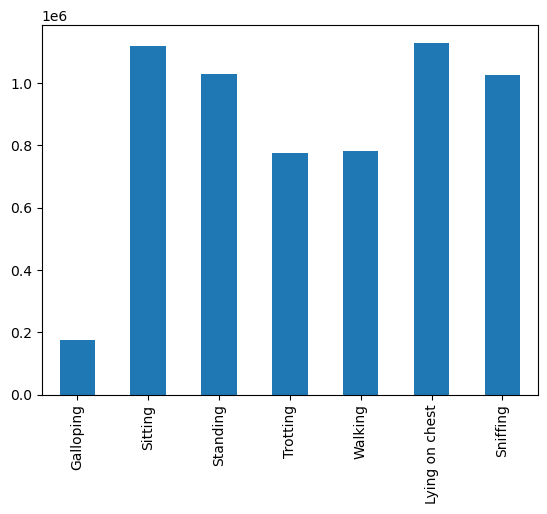

In [7]:
#How many times each value exists in the dataset
df = pd.DataFrame({'Galloping': gal, 'Sitting': sitt, 'Standing': stand, 'Trotting': trot, 'Walking': walk, 'Lying on chest': loc, 'Sniffing': snif})
print(df)
#barchart or boxplot
print (df.sum(axis=0))
df.sum(axis=0).plot.bar()

In [12]:
# Define movement behaviors
movement_behaviors = ['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking', 'Lying chest', 'Sniffing']

# Function to preprocess each chunk
def preprocess_chunk(chunk):
    # Add a new column "Behavior" containing movement data
    chunk['Behavior'] = chunk[['Behavior_1', 'Behavior_2', 'Behavior_3']].apply(
        lambda row: next((b for b in movement_behaviors if b in row.values), ''), axis=1
    )
    # Filter dataset to keep only rows with valid movement behaviors
    chunk = chunk[chunk['Behavior'].isin(movement_behaviors)]
    # Drop the original behavior columns
    chunk = chunk.drop(columns=['Behavior_1', 'Behavior_2', 'Behavior_3'])
    # Drop additional columns not needed
    chunk = chunk.drop(columns=['DogID', 'TestNum', 't_sec', 'Task', 'PointEvent'])
    return chunk

# Function to split, preprocess, and save each chunk
def preprocess_and_save_chunks(data, num_chunks, output_dir, prefix):
    os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists
    chunks = np.array_split(data, num_chunks)
    for i, chunk in enumerate(chunks, start=1):
        # Preprocess the chunk
        processed_chunk = preprocess_chunk(chunk)
        # Save the processed chunk
        processed_chunk.to_csv(os.path.join(output_dir, f'{prefix}_sample_{i}.csv'), index=False)

# Define output directory
output_dir = r"C:\Users\irola\Desktop\Dataset2\DogMoveData_csv_format_2"

In [14]:
# Preprocess and save 10 chunks
preprocess_and_save_chunks(data, 10, output_dir, 'DogMoveData_10chunks')

C:\Users\irola\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [15]:
df_1=pd.read_csv(r"C:\Users\irola\Desktop\Dataset2\DogMoveData_csv_format_2\DogMoveData_10chunks_sample_1.csv")
df_1.head()

,ABack_x,ABack_y,ABack_z,ANeck_x,ANeck_y,ANeck_z,GBack_x,GBack_y,GBack_z,GNeck_x,GNeck_y,GNeck_z,Behavior
0,-0.272949,0.204102,1.185547,-0.394043,-0.187500,-0.801270,-39.489749,62.500004,35.766604,-11.718751,52.185062,-75.378423,Walking
1,-0.296875,-0.004883,1.074219,-0.418457,-0.088867,-0.817383,-42.114260,39.794924,44.250491,-5.493164,55.969242,-67.749028,Walking
2,-0.248535,-0.142578,0.994141,-0.440918,-0.052246,-0.799316,-41.564944,12.878419,59.997562,-2.990723,54.016117,-55.236820,Walking
3,-0.170898,-0.216797,0.927246,-0.457520,-0.034668,-0.791504,-34.240725,-14.099122,75.866704,4.333496,47.058108,-38.940432,Walking
4,-0.084473,-0.226563,0.871094,-0.445313,-0.052734,-0.791504,-23.376466,-31.494143,91.247564,13.427735,33.508303,-23.315431,Walking


In [16]:
df_1

,ABack_x,ABack_y,ABack_z,ANeck_x,ANeck_y,ANeck_z,GBack_x,GBack_y,GBack_z,GNeck_x,GNeck_y,GNeck_z,Behavior
0,-0.272949,0.204102,1.185547,-0.394043,-0.187500,-0.801270,-39.489749,62.500004,35.766604,-11.718751,52.185062,-75.378423,Walking
1,-0.296875,-0.004883,1.074219,-0.418457,-0.088867,-0.817383,-42.114260,39.794924,44.250491,-5.493164,55.969242,-67.749028,Walking
2,-0.248535,-0.142578,0.994141,-0.440918,-0.052246,-0.799316,-41.564944,12.878419,59.997562,-2.990723,54.016117,-55.236820,Walking
3,-0.170898,-0.216797,0.927246,-0.457520,-0.034668,-0.791504,-34.240725,-14.099122,75.866704,4.333496,47.058108,-38.940432,Walking
4,-0.084473,-0.226563,0.871094,-0.445313,-0.052734,-0.791504,-23.376466,-31.494143,91.247564,13.427735,33.508303,-23.315431,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562487,-0.033203,-0.265137,1.054199,0.351074,-0.823242,-0.405762,-20.019532,2.685547,0.915527,8.422852,-10.009766,0.793457,Standing
562488,-0.038574,-0.271973,1.058105,0.348145,-0.861816,-0.411621,-10.253907,-0.610352,2.197266,5.126953,-12.023927,-0.366211,Standing
562489,-0.047363,-0.277832,1.041504,0.349121,-0.882324,-0.423340,-0.793457,-3.234863,3.479004,5.859375,-12.878419,-0.976563,Standing
562490,-0.047852,-0.260742,1.004395,0.349121,-0.880859,-0.413574,11.840821,-3.112793,4.577637,7.751465,-13.854981,-1.220703,Standing


In [17]:
#Combine all dataset samples
joined_files = os.path.join(r"C:\Users\irola\Desktop\Dataset2\DogMoveData_csv_format_2", r"DogMoveData_10chunks_sample_*.csv")
joined_list = glob.glob(joined_files)
df2 = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)                                                        
df2                                                        

,ABack_x,ABack_y,ABack_z,ANeck_x,ANeck_y,ANeck_z,GBack_x,GBack_y,GBack_z,GNeck_x,GNeck_y,GNeck_z,Behavior
0,-0.272949,0.204102,1.185547,-0.394043,-0.187500,-0.801270,-39.489749,62.500004,35.766604,-11.718751,52.185062,-75.378423,Walking
1,-0.296875,-0.004883,1.074219,-0.418457,-0.088867,-0.817383,-42.114260,39.794924,44.250491,-5.493164,55.969242,-67.749028,Walking
2,-0.248535,-0.142578,0.994141,-0.440918,-0.052246,-0.799316,-41.564944,12.878419,59.997562,-2.990723,54.016117,-55.236820,Walking
3,-0.170898,-0.216797,0.927246,-0.457520,-0.034668,-0.791504,-34.240725,-14.099122,75.866704,4.333496,47.058108,-38.940432,Walking
4,-0.084473,-0.226563,0.871094,-0.445313,-0.052734,-0.791504,-23.376466,-31.494143,91.247564,13.427735,33.508303,-23.315431,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035741,0.091797,-0.248535,0.985840,-0.490234,-0.550293,-0.701660,2.380371,-0.305176,1.037598,-1.098633,5.920411,-1.953125,Lying chest
6035742,0.087402,-0.244141,0.979492,-0.532715,-0.528809,-0.723633,2.258301,-0.549316,0.488281,1.831055,-0.366211,-4.272461,Lying chest
6035743,0.091797,-0.248535,0.973145,-0.550781,-0.496582,-0.727539,1.220703,-1.342774,0.122070,3.662110,3.112793,-4.760742,Lying chest
6035744,0.100098,-0.254883,0.966309,-0.556641,-0.485352,-0.752930,0.915527,-2.075195,-0.183105,3.234863,10.498048,-3.234863,Lying chest


In [18]:
for col in df2.columns:
    print(col)

ABack_x
ABack_y
ABack_z
ANeck_x
ANeck_y
ANeck_z
GBack_x
GBack_y
GBack_z
GNeck_x
GNeck_y
GNeck_z
Behavior


In [19]:
df2 = df2.drop(["Unnamed: 0"],axis=1)
df2

KeyError: "['Unnamed: 0'] not found in axis"

In [21]:
df2.to_csv(r"C:\Users\irola\Desktop\Dataset2\DogMoveData_csv_format_2\DogMoveData_merged_2.csv")